<a href="https://colab.research.google.com/github/surbhigari/Recommendation-System-for-product/blob/main/Recommendation_System_for_product_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings


warnings.filterwarnings('ignore')
%matplotlib inline


In [ ]:
#!pip install scikit-surprise
from surprise import KNNBasic, SVD, NormalPredictor, KNNBaseline,KNNWithMeans, KNNWithZScore, BaselineOnly, CoClustering, Reader, dataset, accuracy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357282 sha256=b1fdf9c2454960c160a5895e62e999932cefcf3d962a68397bc775f4631ba55d
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [ ]:
columns =['userID','productID','ratings','timestamp']

data = pd.read_csv('/content/ratings_Electronics.csv',names=columns)
data.head()

,userID,productID,ratings,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [ ]:
data.shape

(7824482, 4)

In [ ]:
data.describe()

,ratings,timestamp
count,7.824482e+06,7.824482e+06
mean,4.012337e+00,1.338178e+09
std,1.380910e+00,6.900426e+07
min,1.000000e+00,9.127296e+08
25%,3.000000e+00,1.315354e+09
50%,5.000000e+00,1.361059e+09
75%,5.000000e+00,1.386115e+09
max,5.000000e+00,1.406074e+09


In [ ]:
##Dropping the 'timestamp' as it is not needed
data = data.drop('timestamp',axis = 1)

Missing value

In [ ]:
data.isna().sum()

,0
userID,0
productID,0
ratings,0


In [ ]:
data.shape

(7824482, 3)

Histogram plot

array([[<Axes: title={'center': 'ratings'}>]], dtype=object)

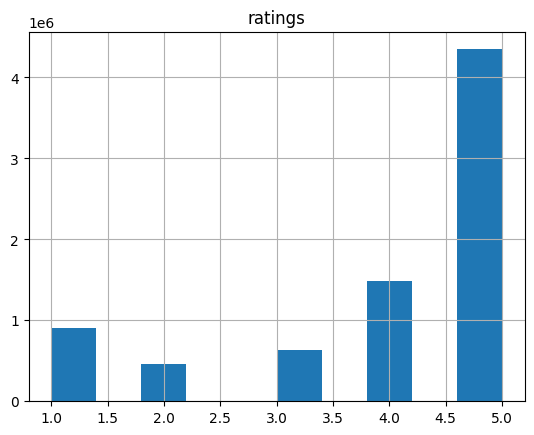

In [ ]:
data.hist('ratings',bins = 10)

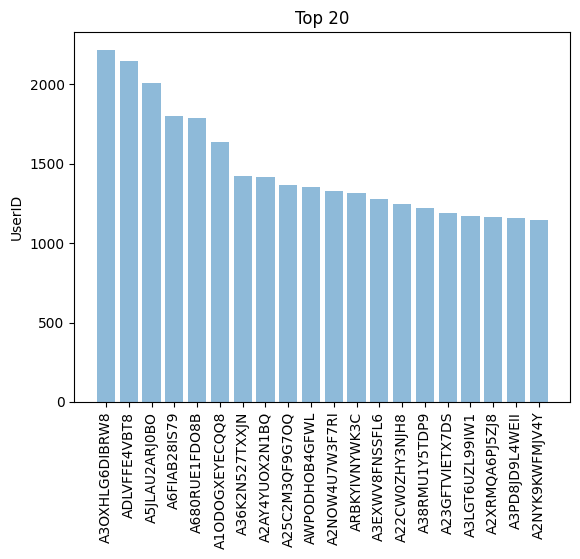

In [ ]:
popular = data[['userID','ratings']].groupby('userID').sum().reset_index()
popular_20 = popular.sort_values('ratings',ascending = False).head(20)

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = (list(popular_20['userID']))
y_pos = np.arange(len(objects))
performance = (list(popular_20['ratings']))

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects,rotation = 'vertical')
plt.ylabel('UserID')
plt.title('Top 20')

plt.show()


In [ ]:
# unique users
data.userID.value_counts()

,count
userID,
A5JLAU2ARJ0BO,520
ADLVFFE4VBT8,501
A3OXHLG6DIBRW8,498
A6FIAB28IS79,431
A680RUE1FDO8B,406
...,...
A1IUWX30VMVJGP,1
A1WBP7XSZI6AUL,1
A2K7UNJHE9ZR0G,1


In [ ]:
print('Number of unique users',len(data['userID'].unique()))

Number of unique users 4201696


In [ ]:
print('Number of unique products', len(data.productID.unique()))

Number of unique products 476002


In [ ]:
print('Unique Ratings',data['ratings'].unique())

Unique Ratings [5. 1. 3. 2. 4.]


In [ ]:
min_ratings1 = data[(data['ratings'] < 2.0)]

In [ ]:
print('Numbeer of unique products rated low',len(min_ratings1['productID'].unique()))

Numbeer of unique products rated low 176283


In [ ]:
med_ratings1 = data[(data['ratings'] > 2.0) & (data['ratings'] < 4.0)]

In [ ]:
print('Number of unique products rated medium',len(med_ratings1['productID'].unique()))

Number of unique products rated medium 152827


In [ ]:
max_ratings1 = data[(data['ratings'] >= 4.0)]

In [ ]:
print('Number of unique products rated high',len(max_ratings1['productID'].unique()))

Number of unique products rated high 410110


In [ ]:
numeric_columns = data.select_dtypes(include='number').columns
avg_rating_prod = data.groupby('productID')[numeric_columns].sum() / data.groupby('productID')[numeric_columns].count()


In [ ]:
print(avg_rating_prod.head())

             ratings
productID           
0132793040  5.000000
0321732944  5.000000
0439886341  1.666667
0511189877  4.500000
0528881469  2.851852


In [ ]:
print('Top 10 highly rated products \n',avg_rating_prod.nlargest(10,'ratings'))

Top 10 highly rated products 
             ratings
productID          
0132793040      5.0
0321732944      5.0
059400232X      5.0
0594033934      5.0
0594287995      5.0
0594450209      5.0
0594450705      5.0
0594511488      5.0
0594514789      5.0
0594549558      5.0


**Take a subset of the dataset to make it less denser**

In [ ]:
userID = data.groupby('userID').count()

In [ ]:
top_user = userID[userID['ratings']>= 50].index

In [ ]:
topuser_ratings_data = data[data['userID'].isin(top_user)]

In [ ]:
#topuser_ratings_data.drop('productID',axis = 1,inplace = True)

In [ ]:
topuser_ratings_data.shape

(125871, 3)

In [ ]:
topuser_ratings_data.head()

,userID,productID,ratings
94,A3BY5KCNQZXV5U,0594451647,5.0
118,AT09WGFUM934H,0594481813,3.0
177,A32HSNCNPRUMTR,0970407998,1.0
178,A17HMM1M7T9PJ1,0970407998,4.0
492,A3CLWR1UUZT6TG,0972683275,5.0


In [ ]:
topuser_ratings_data.sort_values(by='ratings',ascending = False).head()

,userID,productID,ratings
94,A3BY5KCNQZXV5U,0594451647,5.0
4256669,A680RUE1FDO8B,B004M8RWDE,5.0
4258497,AOMEH9W6LHC4S,B004M8SBNE,5.0
4258199,A2GKMXRLI7KLFP,B004M8SBD4,5.0
4258099,A1UNJ46NSB352E,B004M8SBCK,5.0


**Keep data only for products that have 50 or more ratings**

In [ ]:
prodID = data.groupby('productID').count()

In [ ]:
top_prod = prodID[prodID['ratings']>= 50].index

In [ ]:
top_ratings_data = topuser_ratings_data[topuser_ratings_data['productID'].isin(top_prod)]

In [ ]:
top_ratings_data.sort_values(by = 'ratings',ascending = False).head()

,userID,productID,ratings
492,A3CLWR1UUZT6TG,0972683275,5.0
4220481,A2AY4YUOX2N1BQ,B004KJE8FU,5.0
4217715,A2Q204DY2L7YRP,B004K8WPUQ,5.0
4218748,A87CILADRIZW0,B004KA8Y4U,5.0
4219205,A11KZ906QD08C5,B004KCI80I,5.0


In [ ]:
top_ratings_data.shape

(79182, 3)

**Split the data randomly into train and test dataset**

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(top_ratings_data, test_size = 0.30,
                                         random_state = 0)

In [ ]:
test_data.head()

,userID,productID,ratings
6562653,AWH2AY17ZU7W2,B009A6CZ30,5.0
1001830,A1SHHQSPOWR00F,B000HGIWN4,3.0
3904732,A1PVJICI412IN4,B00466X9SY,5.0
7600678,AGYH5U11ZKPFB,B00F3ZN0CC,4.0
2743475,AMKNPIDFLRFMP,B002O3W2OI,2.0


**Build Popularity Recommender model**

In [ ]:
## building the recommendations based on the average of all user ratings for each product.
numeric = data.select_dtypes(include='number').columns
train_data_grouped = train_data.groupby('productID')[numeric].mean().reset_index()

In [ ]:
train_data_grouped.head()

,productID,ratings
0,0972683275,4.5
1,1400501466,3.0
2,1400501520,5.0
3,1400501776,4.0
4,1400532620,1.0


In [ ]:
train_data_sort = train_data_grouped.sort_values(['ratings','productID'],ascending = False)

In [ ]:
train_data_sort.head()

,productID,ratings
14854,B00L3YHF6O,5.0
14851,B00K7O2DJU,5.0
14850,B00K4VQZCM,5.0
14849,B00K0OBEE2,5.0
14845,B00JLADOGW,5.0


In [ ]:
train_data.groupby('productID')['ratings'].count().sort_values(ascending = False).head(10)

,ratings
productID,
B0088CJT4U,135
B003ES5ZUU,128
B007WTAJTO,123
B000N99BBC,122
B00829TIEK,102
B008DWCRQW,102
B00829THK0,98
B002R5AM7C,94
B004CLYEDC,82


In [ ]:
ratings_mean_count = pd.DataFrame(train_data.groupby('productID')['ratings'].mean())

In [ ]:
ratings_mean_count['rating_counts'] = pd.DataFrame(train_data.groupby('productID')['ratings'].count())

In [ ]:
ratings_mean_count.head()

,ratings,rating_counts
productID,,
0972683275,4.5,2
1400501466,3.0,4
1400501520,5.0,1
1400501776,4.0,1
1400532620,1.0,1


In [ ]:
pred_data = test_data[['userID','productID','ratings']]

In [ ]:
pred_data.rename(columns = {'ratings':'true_ratings'},inplace = True)

In [ ]:
pred_data = pred_data.merge(train_data_sort, left_on='productID', right_on = 'productID')

In [ ]:
pred_data.rename(columns = {'ratings' : 'predicted_ratings'}, inplace = True)
pred_data.head()

,userID,productID,true_ratings,predicted_ratings
0,AWH2AY17ZU7W2,B009A6CZ30,5.0,4.5
1,A316XO4RWX21YN,B009A6CZ30,4.0,4.5
2,A1UNJ46NSB352E,B009A6CZ30,5.0,4.5
3,A1CMD08Z49PGKQ,B009A6CZ30,5.0,4.5
4,A1F9Z42CFF9IAY,B009A6CZ30,5.0,4.5


In [ ]:
import sklearn.metrics as metric
from math import sqrt
MSE = metric.mean_squared_error(pred_data['true_ratings'], pred_data['predicted_ratings'])
print('The RMSE value for Popularity Recommender model is', sqrt(MSE))

The RMSE value for Popularity Recommender model is 1.0914119718039657


**The RMSE value for Popularity Recommender model is 1.091**

# **Build Collaborative Filtering model**

In [ ]:
import surprise
from surprise import KNNWithMeans
from surprise.model_selection import GridSearchCV
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split

In [ ]:
reader = Reader(rating_scale=(0.5, 5.0))

** Converting Pandas Dataframe to Surpise formatNew Section**

In [ ]:
data = Dataset.load_from_df(top_ratings_data[['userID', 'productID', 'ratings']],reader)

In [ ]:
# Split data to train and test
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=.3,random_state=0)

In [ ]:
type(trainset)

surprise.trainset.Trainset

#**Training the model**
**KNNWithMeans**

In [ ]:
algo_user = KNNWithMeans(k=10, min_k=6, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo_user.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


**SVD**

In [ ]:
svd_model = SVD(n_factors=50,reg_all=0.02)
svd_model.fit(trainset)

*Evaluate both the models.(Once the model is trained on the training data, it can be used to compute the error (like RMSE)on predictions made on the test data.) We can also use a different method to evaluate the models. *

**Popularity Recommender Model RMSE**



In [ ]:
MSE = metric.mean_squared_error(pred_data['true_ratings'], pred_data['predicted_ratings'])
print('The RMSE value for Popularity Recommender model is', sqrt(MSE))

The RMSE value for Popularity Recommender model is 1.0914119718039657


**Collaborative Filtering Recommender Model (RMSE)**

In [ ]:
print(len(testset))
type(testset)

23755


list

**KNNWithMeans**

In [ ]:
# Evalute on test set
test_pred = algo_user.test(testset)
test_pred[0]

Prediction(uid='A28UMA3GW9L124', iid='B001GX6MJ8', r_ui=3.0, est=3.3492063492063493, details={'actual_k': 2, 'was_impossible': False})

In [ ]:
# compute RMSE
accuracy.rmse(test_pred) #range of value of error

RMSE: 0.9941


0.9940800621800723

**SVD**

In [ ]:
test_pred = svd_model.test(testset)

In [ ]:
# compute RMSE
accuracy.rmse(test_pred)

RMSE: 0.9609


0.9609361199857981

**Parameter tuning of SVD Recommendation system**

In [ ]:
from surprise.model_selection import GridSearchCV
param_grid = {'n_factors' : [5,10,15], "reg_all":[0.01,0.02]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3,refit = True)

In [ ]:
gs.fit(data)

In [ ]:
# get best parameters
gs.best_params

{'rmse': {'n_factors': 5, 'reg_all': 0.01}}

In [ ]:
# Use the "best model" for prediction
gs.test(testset)
accuracy.rmse(gs.test(testset))

RMSE: 0.8565


0.8564850433826154

**The RMSE value for Collaborative Filtering model, byKNNWithMeans is 0.9941 and SVD is 0.9606. After parameter tuning of SVD it is 0.858**

**Get top -K( K= 5)recommendations. We will recommend 5 new products.**

In [ ]:
from collections import defaultdict
def get_top_n(predictions, n=5):

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [ ]:
top_n = get_top_n(test_pred, n=5)


In [ ]:
 #Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

A28UMA3GW9L124 ['B008JJLW4M', 'B000VX6XL6', 'B0002D6QJO', 'B008HO9DK4', 'B00HFRWWAM']
A38NHXL5257E3B ['B004Q3R9AQ', 'B00BOHNYU6', 'B00109Y2DQ', 'B003SGCO3E', 'B00CB2F65O']
A36IHC0K68NS2 ['B00HMREOLK', 'B00ATM1MGA', 'B004ING996', 'B001FAACHK', 'B005SXT6TA']
A231WM2Z2JL0U3 ['B00008OE6I', 'B00005LB8P', 'B00004RC2D', 'B00008OE5G', 'B00006HZ0L']
A2AC6GQ24S45GA ['B001S2RCWI', 'B009E6J1BU', 'B009VV56TY', 'B001TOD7ME', 'B000PGHCG4']
A3OXHLG6DIBRW8 ['B001T9NUJE', 'B004CLYEFK', 'B002VPE1X4', 'B001ID829O', 'B001TH7GVE']
A2XA8CW5DF4MNZ ['B000TKHBDK', 'B00387EW1K', 'B001TOD7ME', 'B005BCCML2', 'B000AP05BO']
AG35JCCQWDRCS ['B000068O16', 'B0036Q7MV0', 'B0045TYDNC', 'B001MSVPM6', 'B00AXTQQDS']
A2X3L31KCXBHCL ['B00829THEG', 'B0044DEDC0', 'B000B63KSM', 'B006WHPQE0', 'B002V1APJ2']
A33YZNZIRA3H97 ['B00BOHNYTW', 'B00HFRWWAM', 'B00AXTQQDS', 'B00BFO14W8', 'B00E8CF0CE']
AX05DBU8IRUWY ['B007WTAJTO', 'B006W8U2MU', 'B008D6YZXG', 'B00IKCQ0EK', 'B00FISD9DO']
A296QED1MV1V0J ['B007VGGFZU', 'B008AST7R6', 'B0058G40O8',

#**Summary**
**Build Popularity Recommender model and found the RMSE value for Popularity Recommender model as 1.091**

**Build Collaborative Filtering model.The RMSE value for Collaborative Filtering model, byKNNWithMeans is 0.9941 and SVD is 0.9606. After parameter tuning of SVD it is 0.858**


**Between RMSE of Popularity and Collaborative filtering , Collaborative fitering fares better with 0.86 scores.**